# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [2]:
import os
os.getcwd()


'/Users/piyushnandwani/Desktop/credit risk model data'

In [3]:
loan_data_inputs_train = pd.read_csv('/Users/piyushnandwani/Desktop/loan data csvs/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('/Users/piyushnandwani/Desktop/loan data csvs/loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('/Users/piyushnandwani/Desktop/loan data csvs/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('/Users/piyushnandwani/Desktop/loan data csvs/loan_data_targets_test.csv', index_col = 0, header = None)

### Explore Data

In [4]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [5]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [6]:
loan_data_inputs_train.shape

(373028, 324)

In [7]:
loan_data_targets_train.shape

(373028, 1)

In [8]:
loan_data_inputs_test.shape

(93257, 324)

In [9]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [10]:
# we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [11]:
# reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [12]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories.
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1) 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
reg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) 
# and targets (dependent variables) 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
reg.intercept_


array([-0.44965256])

In [18]:
reg.coef_


array([[ 0.95942412,  0.75419603,  0.57382612,  0.39296023,  0.23858349,
         0.06514085,  0.09071207,  0.10272728,  0.0434879 ,  0.0700851 ,
         0.06634504,  0.070449  ,  0.08742161,  0.14728105,  0.11435442,
         0.19645364,  0.24278441,  0.23403271,  0.27507017,  0.3358681 ,
         0.49049264,  0.08290307, -0.01561263,  0.27313228,  0.17101618,
         0.17684615,  0.2297484 ,  0.0511012 ,  0.07122902,  0.10982552,
         0.13460411,  0.10251324,  0.06878645,  0.12898412,  1.12592344,
         0.93341095,  0.83522191,  0.6408304 ,  0.48088444,  0.23577322,
        -0.0161227 ,  0.97805026,  0.62682538,  0.36322798,  0.15220974,
         0.07708757,  0.05876805,  0.10545672,  0.14241762,  0.14888828,
        -0.03435282, -0.06297439,  0.28330283,  0.14081337, -0.06773606,
         0.06935818, -0.04301044, -0.06616424, -0.09375449, -0.07705438,
        -0.05423848, -0.10916809,  0.13551236,  0.09324756, -0.02115753,
         0.03160623,  0.15998118,  0.04276516,  0.0

In [19]:
feature_name = inputs_train.columns.values
# Storing names of the columns 

In [20]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.449653
1,grade:A,0.959424
2,grade:B,0.754196
3,grade:C,0.573826
4,grade:D,0.392960
5,grade:E,0.238583
6,grade:F,0.065141
7,home_ownership:OWN,0.090712
8,home_ownership:MORTGAGE,0.102727
9,addr_state:NM_VA,0.043488


## Build a Logistic Regression Model with P-Values

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [22]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [23]:
reg = LogisticRegression_with_p_values()

In [24]:
reg.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.449653
1,grade:A,0.959424
2,grade:B,0.754196
3,grade:C,0.573826
4,grade:D,0.392960
5,grade:E,0.238583
6,grade:F,0.065141
7,home_ownership:OWN,0.090712
8,home_ownership:MORTGAGE,0.102727
9,addr_state:NM_VA,0.043488


In [26]:
p_values = reg.p_values
#We take the result of the newly added method 'p_values' and store it in a variable 'p_values'

In [27]:
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [28]:
summary_table['p_values'] = p_values

In [29]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.449653,NaN
1,grade:A,0.959424,1.123162e-25
2,grade:B,0.754196,2.546667e-34
3,grade:C,0.573826,1.414468e-23
4,grade:D,0.392960,5.679713e-13
5,grade:E,0.238583,1.032942e-06
6,grade:F,0.065141,2.004100e-01
7,home_ownership:OWN,0.090712,7.089808e-06
8,home_ownership:MORTGAGE,0.102727,5.937190e-16
9,addr_state:NM_VA,0.043488,1.745103e-01


In [30]:
# We remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [32]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
feature_name = inputs_train.columns.values

In [34]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.463330
1,grade:A,0.942864
2,grade:B,0.730167
3,grade:C,0.547289
4,grade:D,0.372100
5,grade:E,0.218311
6,grade:F,0.049030
7,home_ownership:OWN,0.096190
8,home_ownership:MORTGAGE,0.104737
9,addr_state:NM_VA,0.044846


In [35]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table


,Feature name,Coefficients,p_values
0,Intercept,-0.463330,NaN
1,grade:A,0.942864,5.290854e-25
2,grade:B,0.730167,2.500102e-32
3,grade:C,0.547289,1.097826e-21
4,grade:D,0.372100,7.008305e-12
5,grade:E,0.218311,5.910955e-06
6,grade:F,0.049030,3.272023e-01
7,home_ownership:OWN,0.096190,1.869832e-06
8,home_ownership:MORTGAGE,0.104737,1.177531e-16
9,addr_state:NM_VA,0.044846,1.609074e-01


In [36]:
import pickle

In [37]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# we export our model to 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [38]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [39]:
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [40]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
y_hat_test = reg2.model.predict(inputs_test)


In [42]:
y_hat_test


array([1, 1, 1, ..., 1, 1, 1])

In [43]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)


In [44]:
y_hat_test_proba


array([[0.07578703, 0.92421297],
       [0.14921606, 0.85078394],
       [0.11485169, 0.88514831],
       ...,
       [0.02691035, 0.97308965],
       [0.04022598, 0.95977402],
       [0.0479313 , 0.9520687 ]])

In [45]:
y_hat_test_proba[:][:,1]
# we take only the probabilities for being 1.

array([0.92421297, 0.85078394, 0.88514831, ..., 0.97308965, 0.95977402,
       0.9520687 ])

In [46]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]


In [47]:
y_hat_test_proba


array([0.92421297, 0.85078394, 0.88514831, ..., 0.97308965, 0.95977402,
       0.9520687 ])

In [48]:
loan_data_targets_test_temp = loan_data_targets_test

In [49]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)


In [50]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)


In [51]:
df_actual_predicted_probs.shape

(93257, 2)

In [52]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [53]:
df_actual_predicted_probs.index = loan_data_inputs_test.index


In [54]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924213
288564,1,0.850784
213591,1,0.885148
263083,1,0.938722
165001,1,0.968575


### Accuracy and Area under the Curve

In [64]:
tr = 0.9
# We create new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [68]:
#confusion matrix
confusion_matrix= pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])


In [69]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.079158,0.030110
1,0.384057,0.506675


In [70]:
#Accuracy of the model
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


np.float64(0.5858326988858745)

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# ROC Curve from a set of actual values and their predicted probabilities.
# three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 4.81538999e-05, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99256198, 0.99102157, ..., 0.5056945 , 0.495115  ,
        0.49449227]))

In [73]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

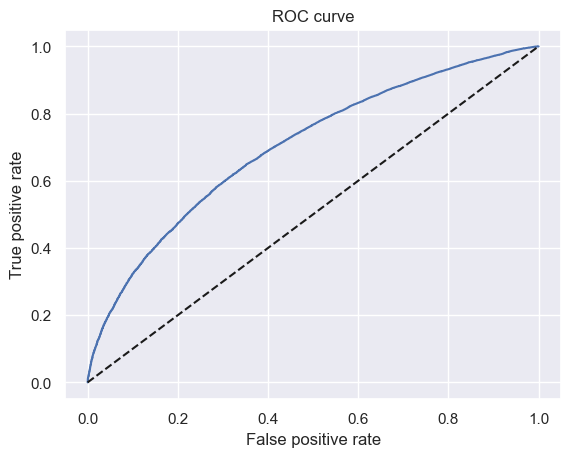

In [75]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')


In [76]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Area Under the Receiver Operating Characteristic Curve (AUROC)
AUROC

np.float64(0.7017942189163948)

### Gini and Kolmogorov-Smirnov

In [77]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')


In [78]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
11208,0,0.494492,0
118702,1,0.495115,0
41663,1,0.500303,0
210472,0,0.505694,0
2808,0,0.507822,0


In [79]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
261095,0,0.990642,1
231463,1,0.991022,1
239228,1,0.991252,1
261086,1,0.992053,1
242624,1,0.992562,1


In [80]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()


In [81]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,11208,0,0.494492,0
1,118702,1,0.495115,0
2,41663,1,0.500303,0
3,210472,0,0.505694,0
4,2808,0,0.507822,0


In [82]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()

df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [83]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,11208,0,0.494492,0,1,0,1
1,118702,1,0.495115,0,2,1,1
2,41663,1,0.500303,0,3,2,1
3,210472,0,0.505694,0,4,2,2
4,2808,0,0.507822,0,5,2,3


In [84]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# cumulative percentage of 'good'
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# cumulative percentage of 'bad'.

In [85]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,11208,0,0.494492,0,1,0,1,0.000011,0.000000,0.000098
1,118702,1,0.495115,0,2,1,1,0.000021,0.000012,0.000098
2,41663,1,0.500303,0,3,2,1,0.000032,0.000024,0.000098
3,210472,0,0.505694,0,4,2,2,0.000043,0.000024,0.000196
4,2808,0,0.507822,0,5,2,3,0.000054,0.000024,0.000294


In [86]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,261095,0,0.990642,1,93253,83063,10190,0.999957,0.999952,1.0
93253,231463,1,0.991022,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.991252,1,93255,83065,10190,0.999979,0.999976,1.0
93255,261086,1,0.992053,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.992562,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

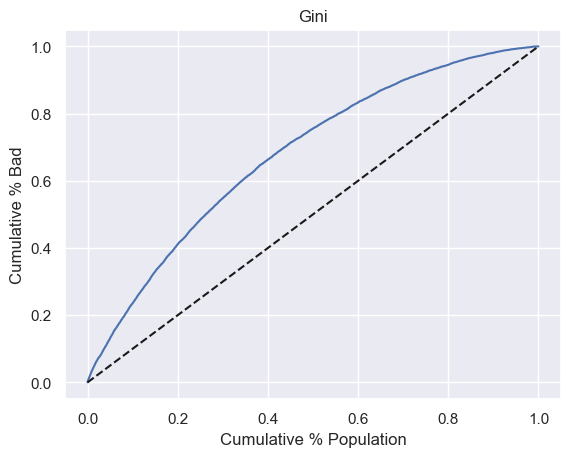

In [87]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')


In [88]:
Gini = AUROC * 2 - 1
# Gini from AUROC.
Gini

np.float64(0.40358843783278964)

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

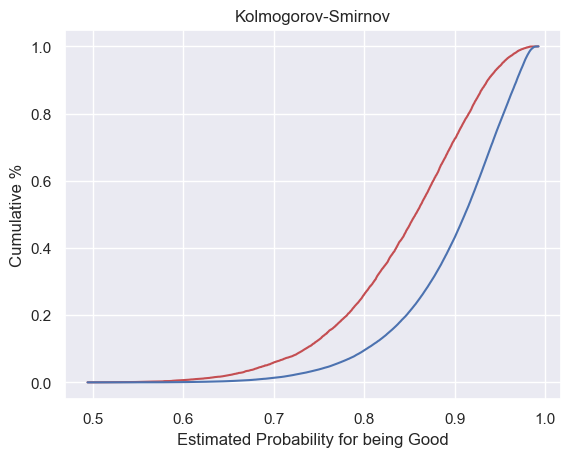

In [89]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')


In [90]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# KS is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'
KS

0.2968539589918978

# Applying the PD Model

### Calculating PD of individual accounts

In [91]:
pd.options.display.max_columns = None


In [92]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [93]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.463330,NaN
1,grade:A,0.942864,5.290854e-25
2,grade:B,0.730167,2.500102e-32
3,grade:C,0.547289,1.097826e-21
4,grade:D,0.372100,7.008305e-12
5,grade:E,0.218311,5.910955e-06
6,grade:F,0.049030,3.272023e-01
7,home_ownership:OWN,0.096190,1.869832e-06
8,home_ownership:MORTGAGE,0.104737,1.177531e-16
9,addr_state:NM_VA,0.044846,1.609074e-01


In [94]:
### In((1-PD)/PD)
### (1-PD)/PD
### 1-PD
###removing the logs would give us probability of non default

In [95]:
## In this case, we get 0.92421297, it is the probabilty that the person will on default. 
y_hat_test_proba

array([0.92421297, 0.85078394, 0.88514831, ..., 0.97308965, 0.95977402,
       0.9520687 ])

### It is difficult to interpret the result in this manner, so we produce SCORECARDS, which can be standardised
### Creating a Scorecard

In [96]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.463330,NaN
1,grade:A,0.942864,5.290854e-25
2,grade:B,0.730167,2.500102e-32
3,grade:C,0.547289,1.097826e-21
4,grade:D,0.372100,7.008305e-12
5,grade:E,0.218311,5.910955e-06
6,grade:F,0.049030,3.272023e-01
7,home_ownership:OWN,0.096190,1.869832e-06
8,home_ownership:MORTGAGE,0.104737,1.177531e-16
9,addr_state:NM_VA,0.044846,1.609074e-01


In [97]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [98]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [99]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.463330,NaN
1,1,grade:A,0.942864,5.290854e-25
2,2,grade:B,0.730167,2.500102e-32
3,3,grade:C,0.547289,1.097826e-21
4,4,grade:D,0.372100,7.008305e-12
5,5,grade:E,0.218311,5.910955e-06
6,6,grade:F,0.049030,3.272023e-01
7,7,home_ownership:OWN,0.096190,1.869832e-06
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16
9,9,addr_state:NM_VA,0.044846,1.609074e-01


In [100]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.463330,NaN,Intercept
1,1,grade:A,0.942864,5.290854e-25,grade
2,2,grade:B,0.730167,2.500102e-32,grade
3,3,grade:C,0.547289,1.097826e-21,grade
4,4,grade:D,0.372100,7.008305e-12,grade
5,5,grade:E,0.218311,5.910955e-06,grade
6,6,grade:F,0.049030,3.272023e-01,grade
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state


In [101]:
min_score = 300
max_score = 850

In [102]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()


Original feature name
Intercept                     -0.463330
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.180762
dti                           -0.139212
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.086156
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.008368
mths_since_last_delinq         0.000000
mths_since_last_record        -0.066406
purpose                        0.000000
term                           0.000000
verification_status           -0.013023
Name: Coefficients, dtype: float64

In [103]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()

min_sum_coef

np.float64(-0.957257555818309)

In [104]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()


Original feature name
Intercept                     -0.463330
acc_now_delinq                 0.145208
addr_state                     0.501561
annual_inc                     0.480280
dti                            0.201357
emp_length                     0.133497
grade                          0.942864
home_ownership                 0.104737
initial_list_status            0.049319
inq_last_6mths                 0.265943
int_rate                       0.965410
mths_since_earliest_cr_line    0.153023
mths_since_issue_d             1.133319
mths_since_last_delinq         0.144417
mths_since_last_record         0.308727
purpose                        0.283290
term                           0.080711
verification_status            0.080365
Name: Coefficients, dtype: float64

In [105]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

max_sum_coef

np.float64(5.510697204479493)

In [106]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.463330,NaN,Intercept,-39.399117
1,1,grade:A,0.942864,5.290854e-25,grade,80.176094
2,2,grade:B,0.730167,2.500102e-32,grade,62.089433
3,3,grade:C,0.547289,1.097826e-21,grade,46.538508
4,4,grade:D,0.372100,7.008305e-12,grade,31.641401
5,5,grade:E,0.218311,5.910955e-06,grade,18.563959
6,6,grade:F,0.049030,3.272023e-01,grade,4.169264
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership,8.179516
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership,8.906242
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state,3.813498


In [107]:
df_scorecard.loc[0, 'Score - Calculation'] = (
    (df_scorecard.loc[0, 'Coefficients'] - min_sum_coef)
    / (max_sum_coef - min_sum_coef)
) * (max_score - min_score) + min_score


df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.463330,NaN,Intercept,342.000904
1,1,grade:A,0.942864,5.290854e-25,grade,80.176094
2,2,grade:B,0.730167,2.500102e-32,grade,62.089433
3,3,grade:C,0.547289,1.097826e-21,grade,46.538508
4,4,grade:D,0.372100,7.008305e-12,grade,31.641401
5,5,grade:E,0.218311,5.910955e-06,grade,18.563959
6,6,grade:F,0.049030,3.272023e-01,grade,4.169264
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership,8.179516
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership,8.906242
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state,3.813498


In [108]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.463330,NaN,Intercept,342.000904,342.0
1,1,grade:A,0.942864,5.290854e-25,grade,80.176094,80.0
2,2,grade:B,0.730167,2.500102e-32,grade,62.089433,62.0
3,3,grade:C,0.547289,1.097826e-21,grade,46.538508,47.0
4,4,grade:D,0.372100,7.008305e-12,grade,31.641401,32.0
5,5,grade:E,0.218311,5.910955e-06,grade,18.563959,19.0
6,6,grade:F,0.049030,3.272023e-01,grade,4.169264,4.0
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership,8.179516,8.0
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership,8.906242,9.0
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state,3.813498,4.0


In [109]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()


In [110]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum() 

max_sum_score_prel

np.float64(849.0)

In [111]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.463330,NaN,Intercept,342.000904,342.0,-0.000904
1,1,grade:A,0.942864,5.290854e-25,grade,80.176094,80.0,-0.176094
2,2,grade:B,0.730167,2.500102e-32,grade,62.089433,62.0,-0.089433
3,3,grade:C,0.547289,1.097826e-21,grade,46.538508,47.0,0.461492
4,4,grade:D,0.372100,7.008305e-12,grade,31.641401,32.0,0.358599
5,5,grade:E,0.218311,5.910955e-06,grade,18.563959,19.0,0.436041
6,6,grade:F,0.049030,3.272023e-01,grade,4.169264,4.0,-0.169264
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership,8.179516,8.0,-0.179516
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership,8.906242,9.0,0.093758
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state,3.813498,4.0,0.186502


In [112]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[77, 'Score - Final'] = 16

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.463330,NaN,Intercept,342.000904,342.0,-0.000904,342.0
1,1,grade:A,0.942864,5.290854e-25,grade,80.176094,80.0,-0.176094,80.0
2,2,grade:B,0.730167,2.500102e-32,grade,62.089433,62.0,-0.089433,62.0
3,3,grade:C,0.547289,1.097826e-21,grade,46.538508,47.0,0.461492,47.0
4,4,grade:D,0.372100,7.008305e-12,grade,31.641401,32.0,0.358599,32.0
5,5,grade:E,0.218311,5.910955e-06,grade,18.563959,19.0,0.436041,19.0
6,6,grade:F,0.049030,3.272023e-01,grade,4.169264,4.0,-0.169264,4.0
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership,8.179516,8.0,-0.179516,8.0
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership,8.906242,9.0,0.093758,9.0
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state,3.813498,4.0,0.186502,4.0


In [113]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()

min_sum_score_prel

np.float64(300.0)

In [114]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

max_sum_score_prel

np.float64(853.0)

### Caclulating Credit Score

In [115]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [116]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.463330,NaN,Intercept,342.000904,342.0,-0.000904,342.0
1,1,grade:A,0.942864,5.290854e-25,grade,80.176094,80.0,-0.176094,80.0
2,2,grade:B,0.730167,2.500102e-32,grade,62.089433,62.0,-0.089433,62.0
3,3,grade:C,0.547289,1.097826e-21,grade,46.538508,47.0,0.461492,47.0
4,4,grade:D,0.372100,7.008305e-12,grade,31.641401,32.0,0.358599,32.0
5,5,grade:E,0.218311,5.910955e-06,grade,18.563959,19.0,0.436041,19.0
6,6,grade:F,0.049030,3.272023e-01,grade,4.169264,4.0,-0.169264,4.0
7,7,home_ownership:OWN,0.096190,1.869832e-06,home_ownership,8.179516,8.0,-0.179516,8.0
8,8,home_ownership:MORTGAGE,0.104737,1.177531e-16,home_ownership,8.906242,9.0,0.093758,9.0
9,9,addr_state:NM_VA,0.044846,1.609074e-01,addr_state,3.813498,4.0,0.186502,4.0


In [117]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [118]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)


In [119]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [120]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]


In [121]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [122]:
scorecard_scores = df_scorecard['Score - Final']

In [123]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [124]:
scorecard_scores.shape

(102,)

In [125]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [126]:
scorecard_scores.shape

(102, 1)

In [127]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)


In [128]:
y_scores.head()

,0
362514,595.0
288564,530.0
213591,560.0
263083,613.0
165001,676.0


In [129]:
y_scores.tail()

,0
115,551.0
296284,665.0
61777,686.0
91763,652.0
167512,636.0


### From Credit Score to PD

In [130]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef


In [131]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

y_hat_proba_from_score.head()

,0
362514,0.924973
288564,0.851640
213591,0.890934
263083,0.938405
165001,0.969660


In [132]:
y_hat_test_proba[0: 5]

array([0.92421297, 0.85078394, 0.88514831, 0.93872193, 0.96857478])

In [133]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.494492
1    0.495115
2    0.500303
3    0.505694
4    0.507822
Name: y_hat_test_proba, dtype: float64

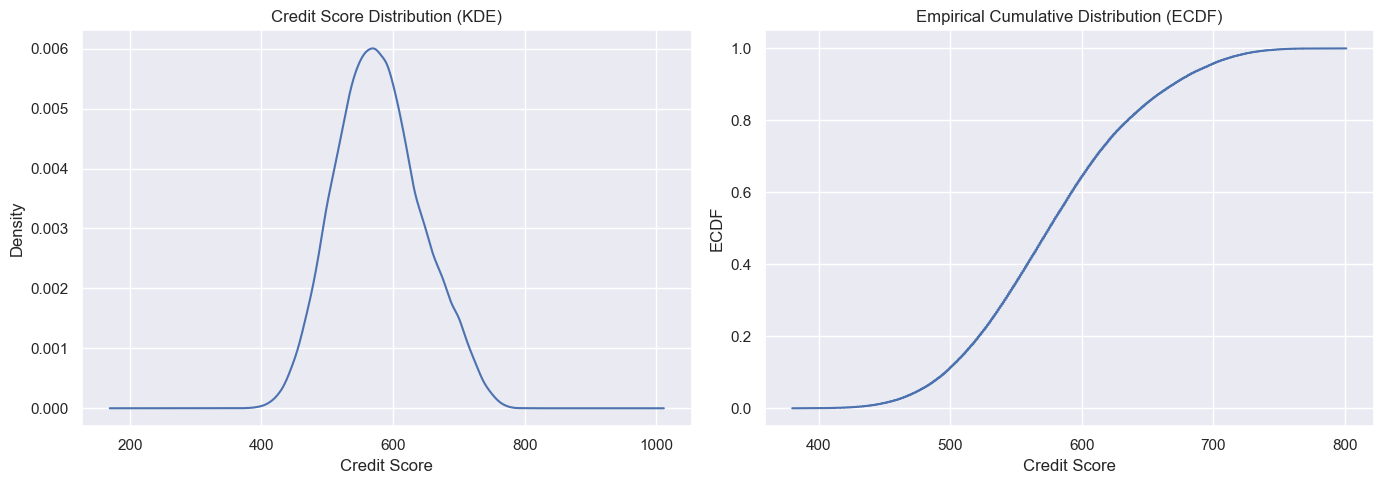

In [142]:
import matplotlib.pyplot as plt

scores = y_scores[0]

plt.figure(figsize=(14,5))

# KDE Plot
plt.subplot(1,2,1)
scores.plot(kind='density')
plt.xlabel("Credit Score")
plt.title("Credit Score Distribution (KDE)")

# ECDF Plot
x = np.sort(scores)
y = np.arange(1, len(x)+1) / len(x)

plt.subplot(1,2,2)
plt.plot(x, y)
plt.xlabel("Credit Score")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution (ECDF)")

plt.tight_layout()
plt.show()

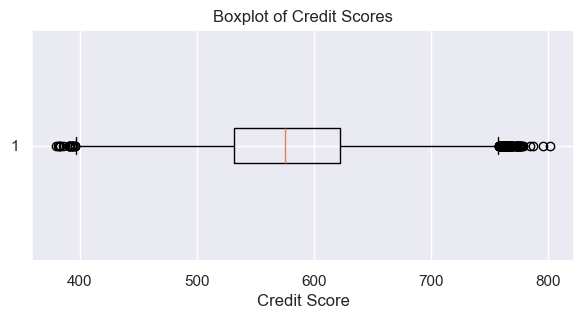

In [143]:
plt.figure(figsize=(7,3))
plt.boxplot(y_scores[0], vert=False)
plt.xlabel("Credit Score")
plt.title("Boxplot of Credit Scores")
plt.show()


### Setting Cut-offs

In [144]:
# We need confusion matrix
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [145]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7382,2808
1,35816,47251


In [146]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079158,0.030110
1,0.384057,0.506675


In [147]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

np.float64(0.5858326988858745)

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score

In [149]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 4.81538999e-05, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99256198, 0.99102157, ..., 0.5056945 , 0.495115  ,
        0.49449227]))

In [150]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

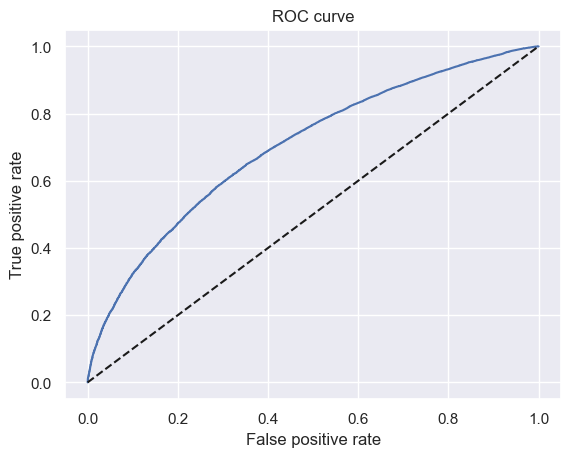

In [152]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [153]:
thresholds

array([       inf, 0.99256198, 0.99102157, ..., 0.5056945 , 0.495115  ,
       0.49449227])

In [154]:
thresholds.shape

(17230,)

In [155]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)


In [156]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']


In [157]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.992562,0.000000,0.000012
2,0.991022,0.000000,0.000048
3,0.990642,0.000098,0.000048
4,0.989217,0.000098,0.000530


In [158]:
df_cutoffs.loc[0, 'thresholds'] = 1 - 1 / np.power(10, 16)

# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [159]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()


In [160]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3505.0
1,0.992562,0.000000,0.000012,798.0
2,0.991022,0.000000,0.000048,781.0
3,0.990642,0.000098,0.000048,778.0
4,0.989217,0.000098,0.000530,766.0


In [161]:
df_cutoffs.loc[0, 'Score'] = max_score


In [162]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992562,0.000000,0.000012,798.0
2,0.991022,0.000000,0.000048,781.0
3,0.990642,0.000098,0.000048,778.0
4,0.989217,0.000098,0.000530,766.0


In [163]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17225,0.529641,0.999509,0.999928,391.0
17226,0.525754,0.999509,0.999976,390.0
17227,0.505694,0.999902,0.999976,383.0
17228,0.495115,0.999902,1.000000,380.0
17229,0.494492,1.000000,1.000000,380.0


In [164]:
# We define a function 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [165]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus,we calculate the number of approved appliations for all thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# we calculate the number of rejected applications for each threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [166]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992562,0.000000,0.000012,798.0,1,93256,0.000011,0.999989
2,0.991022,0.000000,0.000048,781.0,4,93253,0.000043,0.999957
3,0.990642,0.000098,0.000048,778.0,5,93252,0.000054,0.999946
4,0.989217,0.000098,0.000530,766.0,45,93212,0.000483,0.999517


In [167]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17225,0.529641,0.999509,0.999928,391.0,93246,11,0.999882,0.000118
17226,0.525754,0.999509,0.999976,390.0,93250,7,0.999925,0.000075
17227,0.505694,0.999902,0.999976,383.0,93254,3,0.999968,0.000032
17228,0.495115,0.999902,1.000000,380.0,93256,1,0.999989,0.000011
17229,0.494492,1.000000,1.000000,380.0,93257,0,1.000000,0.000000


In [168]:
df_cutoffs.iloc[5000: 6200, ]


,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903524,0.259372,0.548148,572.0,48176,45081,0.516594,0.483406
5001,0.903523,0.259470,0.548148,572.0,48177,45080,0.516605,0.483395
5002,0.903482,0.259470,0.548509,572.0,48207,45050,0.516926,0.483074
5003,0.903480,0.259568,0.548509,572.0,48208,45049,0.516937,0.483063
5004,0.903459,0.259568,0.548653,572.0,48220,45037,0.517066,0.482934
5005,0.903454,0.259666,0.548653,572.0,48221,45036,0.517076,0.482924
5006,0.903423,0.259666,0.548834,572.0,48236,45021,0.517237,0.482763
5007,0.903416,0.259863,0.548834,572.0,48238,45019,0.517259,0.482741
5008,0.903380,0.259863,0.549015,571.0,48253,45004,0.517420,0.482580
5009,0.903379,0.259961,0.549015,571.0,48254,45003,0.517430,0.482570


In [169]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [170]:
df_scorecard.to_csv('df_scorecard.csv')